In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from pbcpy.base import Cell
from pbcpy.grid import Grid
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space
from pbcpy.base import Coord
from pbcpy.system import System
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

# Big Data from Al:

* reading in $\rho_{i}$ and $v_{T}$ from calculations

In [63]:
number_of_columns = 100

In [64]:
data_dens = np.zeros((number_of_columns,125000))
data_vt = np.zeros((number_of_columns,125000))

for i in range(1,number_of_columns+1):
    #if i == 68:
    #    print('NOT CONVERGED')
    #else:
    print(i)
    density = PP('Densities2/Al_'+str(i)+'_0_fde_0rho.pp').read()
    kin_pot = PP('Potentials2/Al_'+str(i)+'_0_vt_rhotot_alph.pp').read()
    rho = density.plot
    v_t = kin_pot.plot
    
    grid_real_rho = Grid_Space(rho.grid.at,rho.grid.nr)
    grid_real_vt = Grid_Space(v_t.grid.at,v_t.grid.nr)

    mydens = Grid_Function(grid_real_rho,griddata_3d=rho.values)
    myvt = Grid_Function(grid_real_vt,griddata_3d=v_t.values)
    
    data_dens[i-1] = mydens.get_values_flatarray()
    data_vt[i-1] = myvt.get_values_flatarray()

1
(50, 50, 50) 125000
(50, 50, 50) 125000
2
(50, 50, 50) 125000
(50, 50, 50) 125000
3
(50, 50, 50) 125000
(50, 50, 50) 125000
4
(50, 50, 50) 125000
(50, 50, 50) 125000
5
(50, 50, 50) 125000
(50, 50, 50) 125000
6
(50, 50, 50) 125000
(50, 50, 50) 125000
7
(50, 50, 50) 125000
(50, 50, 50) 125000
8
(50, 50, 50) 125000
(50, 50, 50) 125000
9
(50, 50, 50) 125000
(50, 50, 50) 125000
10
(50, 50, 50) 125000
(50, 50, 50) 125000
11
(50, 50, 50) 125000
(50, 50, 50) 125000
12
(50, 50, 50) 125000
(50, 50, 50) 125000
13
(50, 50, 50) 125000
(50, 50, 50) 125000
14
(50, 50, 50) 125000
(50, 50, 50) 125000
15
(50, 50, 50) 125000
(50, 50, 50) 125000
16
(50, 50, 50) 125000
(50, 50, 50) 125000
17
(50, 50, 50) 125000
(50, 50, 50) 125000
18
(50, 50, 50) 125000
(50, 50, 50) 125000
19
(50, 50, 50) 125000
(50, 50, 50) 125000
20
(50, 50, 50) 125000
(50, 50, 50) 125000
21
(50, 50, 50) 125000
(50, 50, 50) 125000
22
(50, 50, 50) 125000
(50, 50, 50) 125000
23
(50, 50, 50) 125000
(50, 50, 50) 125000
24
(50, 50, 50) 1250

In [65]:
np.shape(data_dens), np.shape(data_vt)

((100, 125000), (100, 125000))

In [66]:
X = np.zeros((number_of_columns,grid))
Y = np.zeros((number_of_columns,grid))

for i in range(number_of_columns):
    indx  = np.argsort(data_dens[i])
    #indx2 = np.argsort(data_vt[i])
    X[i] = data_dens[i][indx]
    Y[i] = data_vt[i][indx]

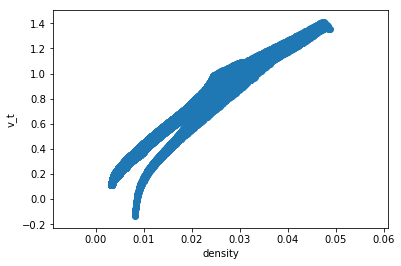

In [67]:
plt.scatter(X[3],Y[3])
plt.xlabel('density')
plt.ylabel('v_t')
plt.show()

In [68]:
np.shape(X), np.shape(Y)

((100, 125000), (100, 125000))

In [73]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.5, train_size = 0.5)

In [75]:
np.shape(X_train), np.shape(X_test), np.shape(Y_test), np.shape(Y_train)

((50, 125000), (50, 125000), (50, 125000), (50, 125000))

In [87]:
model2 = MLPRegressor(hidden_layer_sizes=(30,30))

In [88]:
scores = cross_val_score(model2,X,Y,cv=4)

In [89]:
scores

array([-5.26660094, -5.48151953, -5.85310178, -5.84675388])

In [14]:
model2.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
model2.score(X,Y)

-4.2455506219883681

In [16]:
acc2 = model2.predict(X)-Y
np.shape(Y)

(100, 125000)

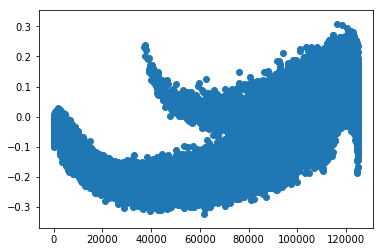

In [17]:
plt.scatter(np.arange(0,grid,1),acc2[20])
plt.show()